In [30]:
import numpy as np
from matplotlib import pyplot as plt
from regressor import LinearRegressor
from scipy.stats import t

In [31]:
def load_files(n_var = 3):
    filename = 'Y_30.txt'
    data = open(filename).readlines()[4:19]

    Y = []
    for row in data:
        Y.append(float(row.split()[n_var - 1]))

    y = np.array(Y)
    x = np.loadtxt('X.txt')

    return x,y


variance: 5.311090445609479

covariance: 
[[ 1.29727633e-03 -7.46146185e-03 -1.08598659e-02  4.70400025e-01]
 [-7.46146185e-03  1.16256000e-01 -2.04865472e-01 -7.60064275e+00]
 [-1.08598659e-02 -2.04865472e-01  1.21830987e+00  1.22545207e+01]
 [ 4.70400025e-01 -7.60064275e+00  1.22545207e+01  5.15445641e+02]]

correlation: 
[[ 1.         -0.60757513 -0.27316769  0.57525401]
 [-0.60757513  1.         -0.54435498 -0.98186368]
 [-0.27316769 -0.54435498  1.          0.48901932]
 [ 0.57525401 -0.98186368  0.48901932  1.        ]]

standart error: 
[ 0.03601772  0.34096334  1.10377075 22.70342795]



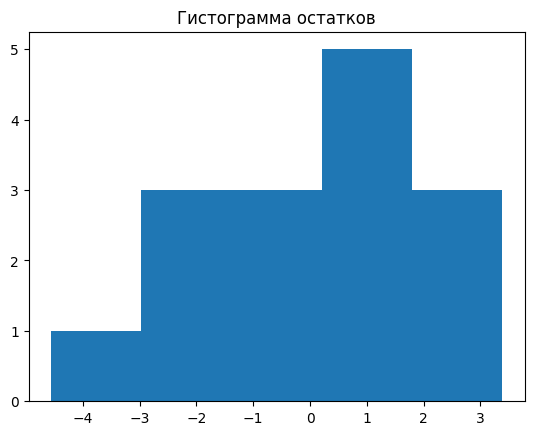

In [32]:
x, y = load_files()
regressor = LinearRegressor()
regressor.fit(x, y)
y_pred = regressor.predict()
print(f'variance: {regressor.get_variance()}\n')
print(f'covariance: \n{regressor.get_covariance()}\n')
print(f'correlation: \n{regressor.get_correlation()}\n')
print(f'standart error: \n{regressor.get_standart_errors()}\n')

plt.figure()
plt.hist(y - y_pred, bins = 5)
plt.title('Гистограмма остатков')
plt.show()

determination biased: 0.9944857202279175
determination unbiased: 0.9929818257446222


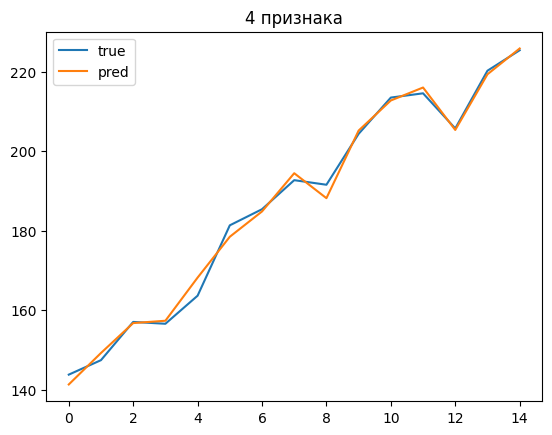

In [33]:
print(f'determination biased: {regressor.get_determination()}')
print(f'determination unbiased: {regressor.get_determination(bias=False)}')

plt.figure()
plt.plot(range(len(y)), y, label="true")
plt.plot(range(len(y)), y_pred, label="pred")
plt.title('4 признака')
plt.legend()
plt.show()


intervals: 
[[ 3.15482305e-01  4.74031251e-01]
 [-6.69083904e-02  1.43400212e+00]
 [-1.64101198e-01  4.69466488e+00]
 [-9.33383833e+01  6.60143272e+00]]

Tuki: 
[[   0.28739254    0.50212101]
 [  -0.33282136    1.69991509]
 [  -1.02491795    5.55548164]
 [-111.04449771   24.30754713]]

koef: 
[  0.39475678   0.68354686   2.26528184 -43.36847529]
coef 2 == 0
coef 3 == 0
coef 4 == 0


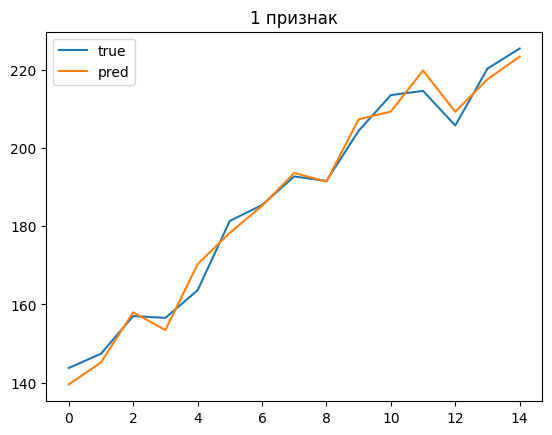

variance: 11.80998487196016

covariance: 
[[6.75850526e-06]]

correlation: 
[[1.]]

standart error: 
[0.00259971]

intervals: 
[[0.54742121 0.55857286]]

Tuki: 
[[0.54742121 0.55857286]]

koef: 
[0.55299703]


In [34]:
print(f'intervals: \n{regressor.get_sep_intervals()}\n')
print(f'Tuki: \n{regressor.get_tog_intervals()}\n')
print(f'koef: \n{regressor.a}')

alpha = 0.05
student = t(x.shape[0] - x.shape[1])
val = student.ppf((2 - alpha) / 2)
for i, coef in enumerate(regressor.a):
    if abs(coef) / (np.sqrt(regressor.get_variance() * regressor.get_covariance()[i, i])) < val:
        print(f"coef {i + 1} == 0")

regressor = LinearRegressor()
regressor.fit(np.array([x[:, 0]]).T, y)
y_pred = regressor.predict()   
plt.plot(range(len(y)), y, label="true")
plt.plot(range(len(y)), y_pred, label="pred")
plt.title('1 признак')
plt.legend()
plt.show()     

print(f'variance: {regressor.get_variance()}\n')
print(f'covariance: \n{regressor.get_covariance()}\n')
print(f'correlation: \n{regressor.get_correlation()}\n')
print(f'standart error: \n{regressor.get_standart_errors()}\n')

print(f'intervals: \n{regressor.get_sep_intervals()}\n')
print(f'Tuki: \n{regressor.get_tog_intervals()}\n')
print(f'koef: \n{regressor.a}')

In [35]:
x_t, y_t = x[0, :], y[0]
x_res, y_res = x[1:, :], y[1:]
regressor.fit(x_res, y_res)
y_t_pred = x_t.T.dot(regressor.a)
variance_t = regressor.get_variance() * (x_t.T.dot(np.linalg.inv(x_res.T.dot(x_res))).dot(x_t) + 1)
print(f'y real: {y_t}\ny predicted: {y_t_pred}')
print(f'variance: {variance_t}')

alpha = 0.05
student = t(x.shape[0] - x.shape[1])
val = student.ppf(1 - alpha / 2)
interval = np.array([y_t_pred - val, y_t_pred + val])
print(f'interval: {interval}')

y real: 143.76845
y predicted: 140.3756979882213
variance: 6.8502839047568065
interval: [138.17471283 142.57668315]
